In [1]:
import os
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline

from pylab import rcParams
#from plotly import tools
# import plotly.plotly as py
#from plotly.offline import init_notebook_mode, iplot
#init_notebook_mode(connected=True)
#import plotly.graph_objs as go
#import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error

In [31]:
# 读取数据
data = pd.read_csv("./dataset/dataset.csv", index_col = 0)
meantemp_data = data['meantemp']
meantemp_data_diff = meantemp_data.diff()

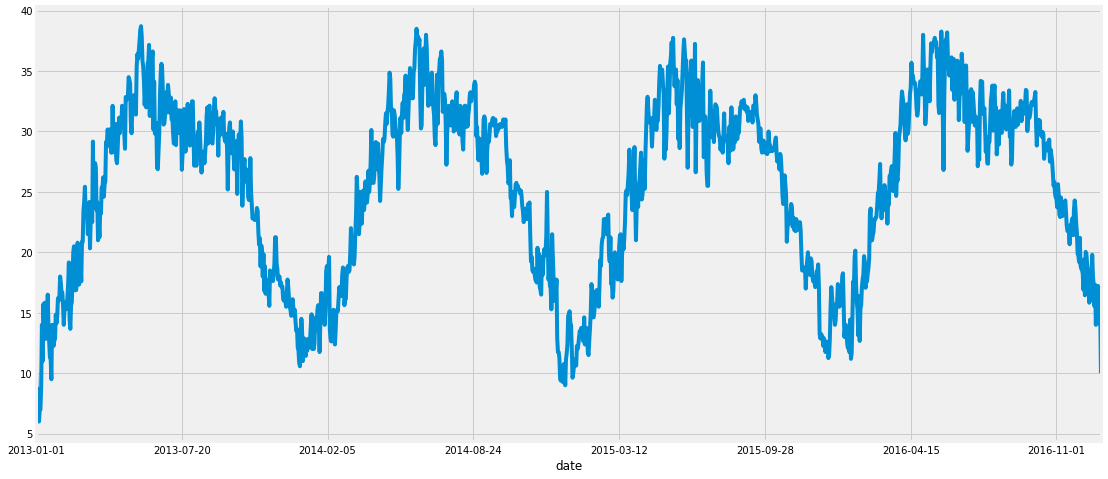

In [32]:
meantemp_data.plot()

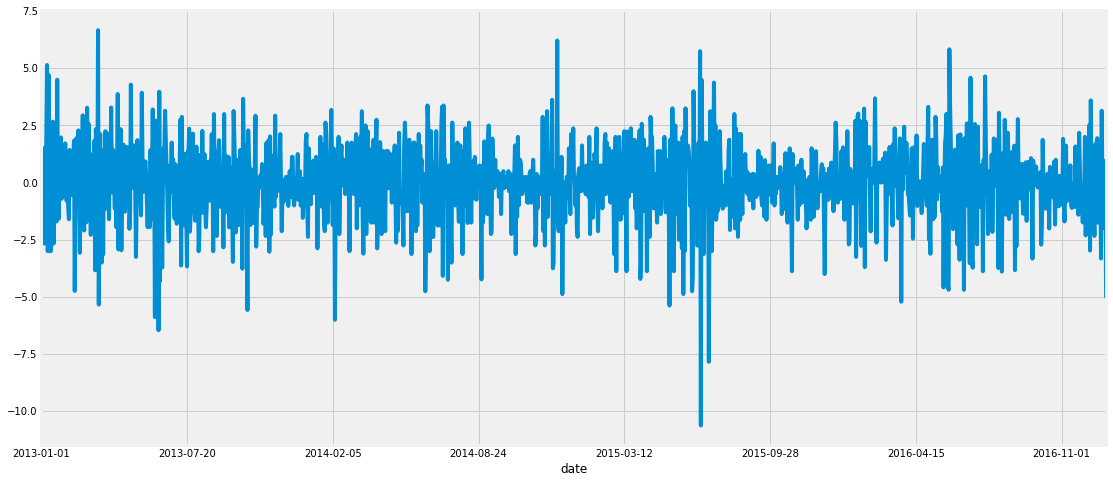

In [33]:
meantemp_data_diff.plot()

# AR模型

In [34]:
meantemp_data_diff.isnull().sum()

1

In [35]:
meantemp_data_diff = meantemp_data_diff.fillna(method = "ffill")
meantemp_data_diff = meantemp_data_diff.fillna(method = "bfill")
meantemp_data_diff.isnull().sum()

0

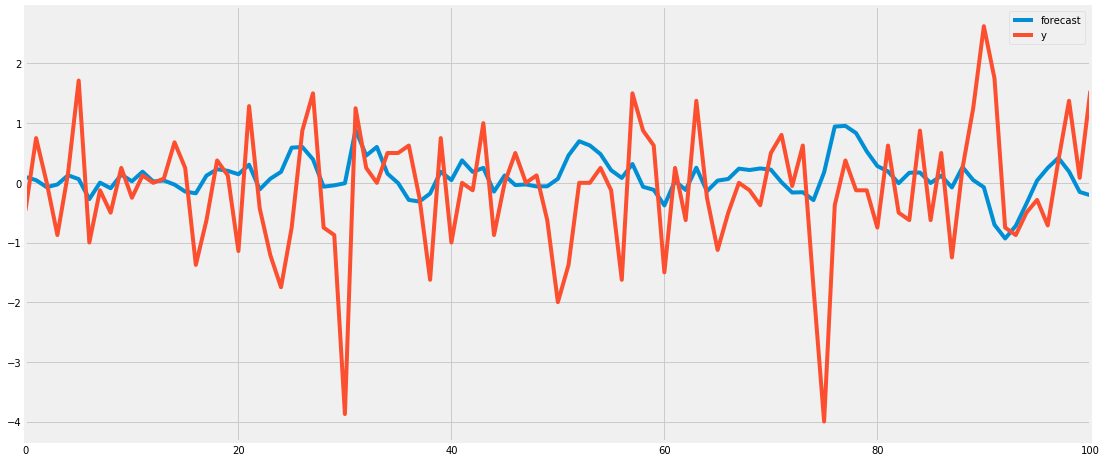

In [74]:
rcParams['figure.figsize'] = 17, 8
AR_meantemp = ARMA(meantemp_data_diff.values, order=(5,0))
res = AR_meantemp.fit()
res.plot_predict(start=1000, end=1100)
plt.show()

In [64]:
fittedvalues = res.fittedvalues
fittedvalues.shape

(1462,)

In [65]:
y_pred = fittedvalues[1000:1100]
y_pred

array([ 0.09820085,  0.04498607, -0.07335541, -0.02770892,  0.12687611,
        0.06241656, -0.2724337 ,  0.0029528 , -0.09065175,  0.1391161 ,
        0.02584973,  0.18652937,  0.02237145,  0.03888707, -0.02978518,
       -0.14640036, -0.17530575,  0.12131323,  0.22812696,  0.2012415 ,
        0.14386446,  0.30405924, -0.11037184,  0.06913111,  0.18360559,
        0.58935676,  0.60098032,  0.39412689, -0.06474051, -0.04211662,
       -0.00657216,  0.88752572,  0.45717701,  0.60117965,  0.15277313,
       -0.00510435, -0.28622079, -0.31383831, -0.17878543,  0.18624136,
        0.04537338,  0.37682239,  0.1836058 ,  0.25066411, -0.14674627,
        0.12347244, -0.03712728, -0.0272387 , -0.06014229, -0.05749737,
        0.06750871,  0.45993657,  0.69699732,  0.6267215 ,  0.48120407,
        0.21094024,  0.0821993 ,  0.31592114, -0.0666274 , -0.11705859,
       -0.3781895 ,  0.03106778, -0.11932932,  0.25319286, -0.14057691,
        0.03734207,  0.0649539 ,  0.23768503,  0.21480854,  0.24

In [66]:
y_true = meantemp_data_diff.values[1000:1100]
y_true

array([-0.46428571,  0.75      ,  0.        , -0.875     ,  0.16071429,
        1.71428571, -1.        , -0.125     , -0.5       ,  0.25      ,
       -0.25      ,  0.125     ,  0.        ,  0.07142857,  0.67857143,
        0.25      , -1.375     , -0.625     ,  0.375     ,  0.125     ,
       -1.14285714,  1.28571429, -0.42857143, -1.21428571, -1.75      ,
       -0.75      ,  0.875     ,  1.5       , -0.75      , -0.875     ,
       -3.875     ,  1.25      ,  0.25      ,  0.        ,  0.5       ,
        0.5       ,  0.625     , -0.25      , -1.625     ,  0.75      ,
       -1.        ,  0.        , -0.125     ,  1.        , -0.875     ,
        0.        ,  0.5       ,  0.        ,  0.125     , -0.625     ,
       -2.        , -1.375     ,  0.        ,  0.        ,  0.25      ,
       -0.125     , -1.625     ,  1.5       ,  0.875     ,  0.625     ,
       -1.5       ,  0.25      , -0.625     ,  1.375     , -0.25      ,
       -1.125     , -0.5       ,  0.        , -0.125     , -0.37

In [67]:
err = mean_squared_error(y_true, y_pred)
err

1.0798969791741406

# MA模型

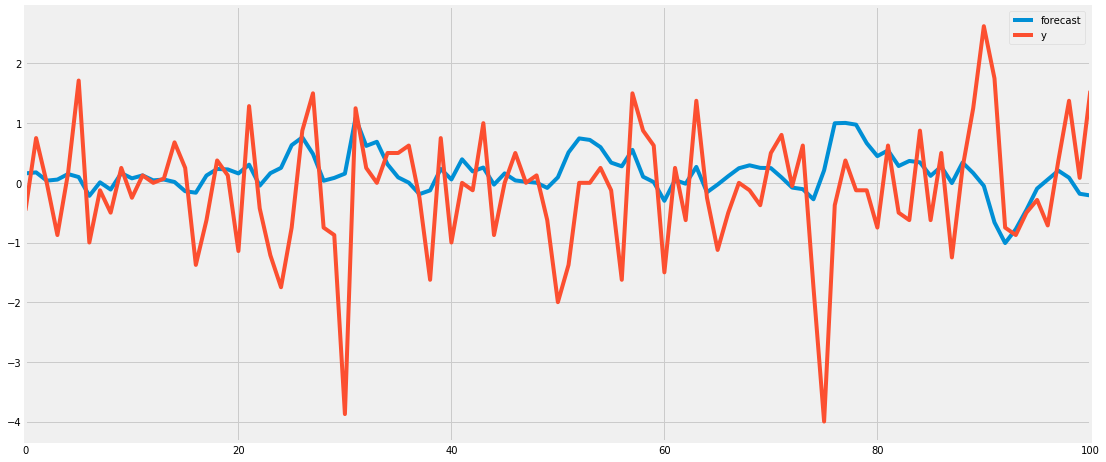

In [91]:
rcParams['figure.figsize'] = 17, 8
MA_meantemp = ARMA(meantemp_data_diff.values, order=(0,4))
res = MA_meantemp.fit()
res.plot_predict(start=1000, end=1100)
plt.show()

In [92]:
fittedvalues = res.fittedvalues
fittedvalues.shape

(1462,)

In [93]:
y_pred = fittedvalues[1000:1100]
y_pred

array([ 0.15822421,  0.17513874,  0.03651004,  0.05442697,  0.14756381,
        0.09681362, -0.21831312,  0.00830258, -0.11256209,  0.16286058,
        0.07549383,  0.12431621,  0.04125499,  0.055557  ,  0.01418462,
       -0.14046986, -0.16540273,  0.12283017,  0.23245685,  0.22496347,
        0.15753922,  0.30467693, -0.04750402,  0.16158883,  0.25090047,
        0.63100517,  0.76243398,  0.48436211,  0.0354238 ,  0.08255558,
        0.15440531,  1.08541639,  0.61929311,  0.68756373,  0.3107335 ,
        0.09167647,  0.00250482, -0.18904514, -0.12642322,  0.2337548 ,
        0.05670349,  0.39426205,  0.19131223,  0.25658791, -0.0299221 ,
        0.15794728,  0.0401066 ,  0.01831293,  0.00220109, -0.08527955,
        0.0927768 ,  0.51031912,  0.74462223,  0.7190324 ,  0.59809909,
        0.33873038,  0.27681619,  0.55211149,  0.10253241,  0.012282  ,
       -0.30092615,  0.04607483, -0.01472359,  0.26673238, -0.15778655,
       -0.02908349,  0.11219504,  0.24464133,  0.2935909 ,  0.25

In [94]:
y_true = meantemp_data_diff.values[1000:1100]
y_true

array([-0.46428571,  0.75      ,  0.        , -0.875     ,  0.16071429,
        1.71428571, -1.        , -0.125     , -0.5       ,  0.25      ,
       -0.25      ,  0.125     ,  0.        ,  0.07142857,  0.67857143,
        0.25      , -1.375     , -0.625     ,  0.375     ,  0.125     ,
       -1.14285714,  1.28571429, -0.42857143, -1.21428571, -1.75      ,
       -0.75      ,  0.875     ,  1.5       , -0.75      , -0.875     ,
       -3.875     ,  1.25      ,  0.25      ,  0.        ,  0.5       ,
        0.5       ,  0.625     , -0.25      , -1.625     ,  0.75      ,
       -1.        ,  0.        , -0.125     ,  1.        , -0.875     ,
        0.        ,  0.5       ,  0.        ,  0.125     , -0.625     ,
       -2.        , -1.375     ,  0.        ,  0.        ,  0.25      ,
       -0.125     , -1.625     ,  1.5       ,  0.875     ,  0.625     ,
       -1.5       ,  0.25      , -0.625     ,  1.375     , -0.25      ,
       -1.125     , -0.5       ,  0.        , -0.125     , -0.37

In [95]:
err = mean_squared_error(y_true, y_pred)
err

1.114369114895951

# ARMA模型

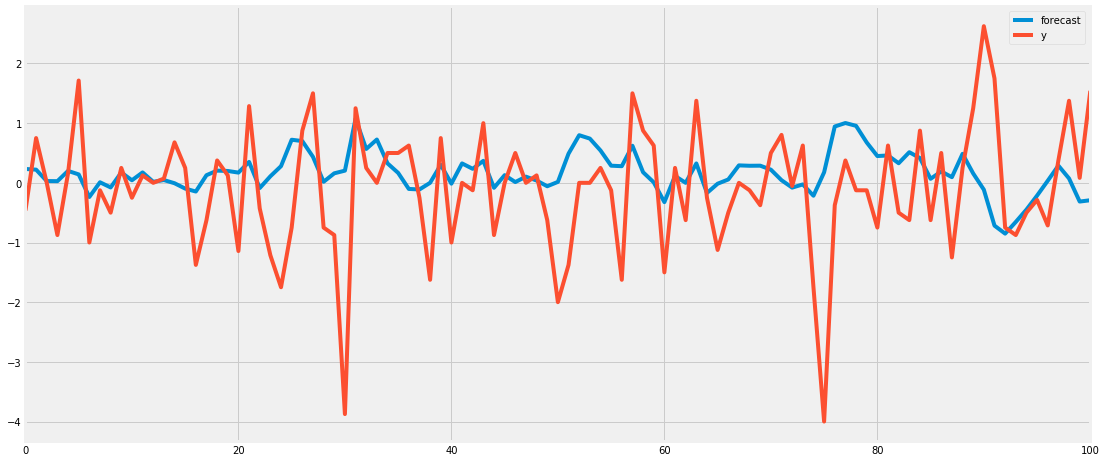

In [113]:
rcParams['figure.figsize'] = 17, 8
ARMA_meantemp = ARMA(meantemp_data_diff.values, order=(5,4))
res = ARMA_meantemp.fit()
res.plot_predict(start=1000, end=1100)
plt.show()

In [114]:
fittedvalues = res.fittedvalues
fittedvalues.shape

(1462,)

In [115]:
y_pred = fittedvalues[1000:1100]
y_pred

array([ 2.32297269e-01,  2.21005866e-01,  2.98778718e-02,  2.77862207e-02,
        1.99814606e-01,  1.41275064e-01, -2.37040298e-01,  9.32930153e-03,
       -7.71275842e-02,  1.73402168e-01,  4.29929948e-02,  1.74650563e-01,
        1.69093881e-02,  4.66833442e-02, -6.85547492e-03, -9.65779011e-02,
       -1.45689805e-01,  1.28066901e-01,  2.04857533e-01,  1.98663287e-01,
        1.71542924e-01,  3.50921207e-01, -8.78329169e-02,  1.09622537e-01,
        2.79522180e-01,  7.22209036e-01,  6.99540645e-01,  4.35512845e-01,
        1.76640820e-02,  1.59485704e-01,  2.04206700e-01,  1.07394880e+00,
        5.67474021e-01,  7.25635597e-01,  3.26606880e-01,  1.66263401e-01,
       -1.02227889e-01, -1.11159824e-01,  5.07395426e-04,  3.02296623e-01,
       -1.37924181e-02,  3.25245321e-01,  2.34788929e-01,  3.68610279e-01,
       -8.32639414e-02,  1.28447227e-01,  1.28435360e-02,  1.03181856e-01,
        3.85105405e-02, -5.73098672e-02,  1.57860587e-02,  4.89263093e-01,
        7.98334501e-01,  

In [116]:
y_true = meantemp_data_diff.values[1000:1100]
y_true

array([-0.46428571,  0.75      ,  0.        , -0.875     ,  0.16071429,
        1.71428571, -1.        , -0.125     , -0.5       ,  0.25      ,
       -0.25      ,  0.125     ,  0.        ,  0.07142857,  0.67857143,
        0.25      , -1.375     , -0.625     ,  0.375     ,  0.125     ,
       -1.14285714,  1.28571429, -0.42857143, -1.21428571, -1.75      ,
       -0.75      ,  0.875     ,  1.5       , -0.75      , -0.875     ,
       -3.875     ,  1.25      ,  0.25      ,  0.        ,  0.5       ,
        0.5       ,  0.625     , -0.25      , -1.625     ,  0.75      ,
       -1.        ,  0.        , -0.125     ,  1.        , -0.875     ,
        0.        ,  0.5       ,  0.        ,  0.125     , -0.625     ,
       -2.        , -1.375     ,  0.        ,  0.        ,  0.25      ,
       -0.125     , -1.625     ,  1.5       ,  0.875     ,  0.625     ,
       -1.5       ,  0.25      , -0.625     ,  1.375     , -0.25      ,
       -1.125     , -0.5       ,  0.        , -0.125     , -0.37

In [117]:
err = mean_squared_error(y_true, y_pred)
err

1.1244320272802732

# ARIMA模型

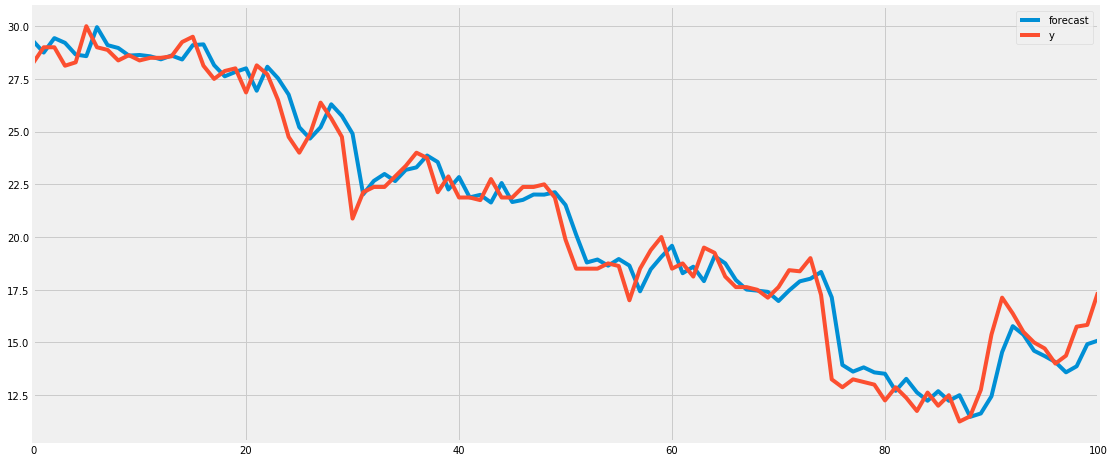

In [126]:
rcParams['figure.figsize'] = 17, 8
model = ARIMA(meantemp_data.values, order=(4,1,4))
result = model.fit()
result.plot_predict(start=1000, end=1100)
plt.show()

In [127]:
fittedvalues = res.fittedvalues
fittedvalues.shape

(1462,)

In [128]:
y_pred = fittedvalues[1000:1100]
y_pred

array([ 2.32297269e-01,  2.21005866e-01,  2.98778718e-02,  2.77862207e-02,
        1.99814606e-01,  1.41275064e-01, -2.37040298e-01,  9.32930153e-03,
       -7.71275842e-02,  1.73402168e-01,  4.29929948e-02,  1.74650563e-01,
        1.69093881e-02,  4.66833442e-02, -6.85547492e-03, -9.65779011e-02,
       -1.45689805e-01,  1.28066901e-01,  2.04857533e-01,  1.98663287e-01,
        1.71542924e-01,  3.50921207e-01, -8.78329169e-02,  1.09622537e-01,
        2.79522180e-01,  7.22209036e-01,  6.99540645e-01,  4.35512845e-01,
        1.76640820e-02,  1.59485704e-01,  2.04206700e-01,  1.07394880e+00,
        5.67474021e-01,  7.25635597e-01,  3.26606880e-01,  1.66263401e-01,
       -1.02227889e-01, -1.11159824e-01,  5.07395426e-04,  3.02296623e-01,
       -1.37924181e-02,  3.25245321e-01,  2.34788929e-01,  3.68610279e-01,
       -8.32639414e-02,  1.28447227e-01,  1.28435360e-02,  1.03181856e-01,
        3.85105405e-02, -5.73098672e-02,  1.57860587e-02,  4.89263093e-01,
        7.98334501e-01,  

In [129]:
y_true = meantemp_data_diff.values[1000:1100]
y_true

array([-0.46428571,  0.75      ,  0.        , -0.875     ,  0.16071429,
        1.71428571, -1.        , -0.125     , -0.5       ,  0.25      ,
       -0.25      ,  0.125     ,  0.        ,  0.07142857,  0.67857143,
        0.25      , -1.375     , -0.625     ,  0.375     ,  0.125     ,
       -1.14285714,  1.28571429, -0.42857143, -1.21428571, -1.75      ,
       -0.75      ,  0.875     ,  1.5       , -0.75      , -0.875     ,
       -3.875     ,  1.25      ,  0.25      ,  0.        ,  0.5       ,
        0.5       ,  0.625     , -0.25      , -1.625     ,  0.75      ,
       -1.        ,  0.        , -0.125     ,  1.        , -0.875     ,
        0.        ,  0.5       ,  0.        ,  0.125     , -0.625     ,
       -2.        , -1.375     ,  0.        ,  0.        ,  0.25      ,
       -0.125     , -1.625     ,  1.5       ,  0.875     ,  0.625     ,
       -1.5       ,  0.25      , -0.625     ,  1.375     , -0.25      ,
       -1.125     , -0.5       ,  0.        , -0.125     , -0.37

In [130]:
err = mean_squared_error(y_true, y_pred)
err

1.1244320272802732

# 机器学习模型